In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv('Disease_Training.csv').dropna(axis=1)

In [4]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [5]:
disease_count = data['prognosis'].value_counts()

In [6]:
disease_count

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [7]:
temp_df = pd.DataFrame({
    'Disease' : disease_count.index,
    'Counts' : disease_count.values
})

temp_df

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


In [8]:
plt.figure( figsize = (12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, 'Fungal infection'),
  Text(1, 0, 'Hepatitis C'),
  Text(2, 0, 'Hepatitis E'),
  Text(3, 0, 'Alcoholic hepatitis'),
  Text(4, 0, 'Tuberculosis'),
  Text(5, 0, 'Common Cold'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Dimorphic hemmorhoids(piles)'),
  Text(8, 0, 'Heart attack'),
  Text(9, 0, 'Varicose veins'),
  Text(10, 0, 'Hypothyroidism'),
  Text(11, 0, 'Hyperthyroidism'),
  Text(12, 0, 'Hypoglycemia'),
  Text(13, 0, 'Osteoarthristis'),
  Text(14, 0, 'Arthritis'),
  Text(15, 0, '(vertigo) Paroymsal  Positional Vertigo'),
  Text(16, 0, 'Acne'),
  Text(17, 0, 'Urinary tract infection'),
  Text(18, 0, 'Psoriasis'),
  Text(19, 0, 'Hepatitis D'),
  Text(20, 0, 'Hepatitis B'),
  Text(21, 0, 'Allergy'),
  Text(22, 0, 'hepatitis A'),
  Text(23, 0,

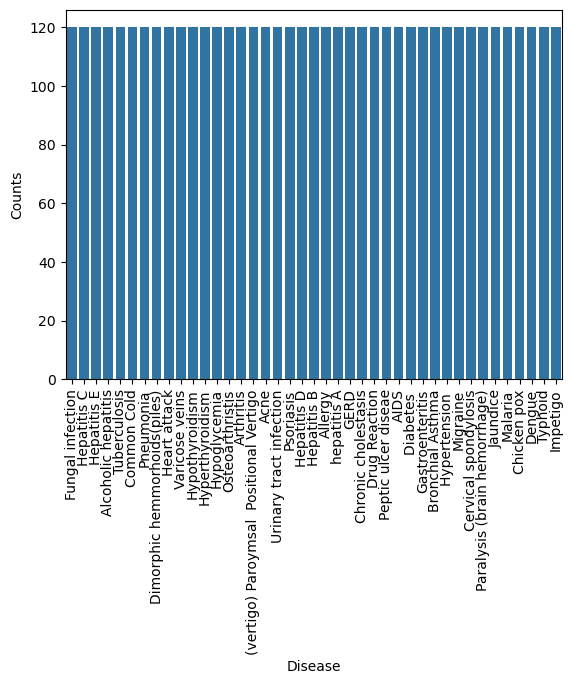

In [9]:
sns.barplot(data = temp_df, x = 'Disease', y = 'Counts')
plt.xticks(rotation = 90)

In [10]:
encoder = LabelEncoder()

In [11]:
# the below line converts categorical data into prognosis to 2 distributional data in ecoder
data['prognosis'] = encoder.fit_transform(data['prognosis']) 

In [12]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35


In [13]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [15]:
print(f"Train : {X_train.shape}, {y_train.shape}")

Train : (3936, 132), (3936,)


In [16]:
X_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
2993,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
639,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
models = {
    'SVC' : SVC(),
    'Random Forest' : RandomForestClassifier(random_state = 18)
}

In [18]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

In [19]:
for model_name in models:

    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring)
    # n_jobs = -1 means use all the available CPUs for faster computation
    # cv = 10 split data into 10 equal parts means 9 in training, 1 in testing and process it 10 times

    print("***"*20)
    print(model_name)
    print(f"Scores : {scores}")
    print(f"Mean Score: {np.mean(scores)}")
    

************************************************************
SVC
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
************************************************************
Random Forest
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [20]:
svm_model = SVC()

In [21]:
svm_model.fit(X_train, y_train)

SVC()

In [22]:
svm_pred = svm_model.predict(X_test)

In [23]:
print(f"Accuracy on training dataset by SVM classifier : {accuracy_score(y_train, svm_model.predict(X_train))*100}")

Accuracy on training dataset by SVM classifier : 100.0


In [24]:
print(f"Accuracy on testing dataset by SVM classifier : {accuracy_score(y_test, svm_pred)*100}")

Accuracy on testing dataset by SVM classifier : 100.0


In [25]:
cf_matrix = confusion_matrix(y_test, svm_pred)
cf_matrix

array([[32,  0,  0, ...,  0,  0,  0],
       [ 0, 21,  0, ...,  0,  0,  0],
       [ 0,  0, 20, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 26,  0,  0],
       [ 0,  0,  0, ...,  0, 18,  0],
       [ 0,  0,  0, ...,  0,  0, 22]])

<Axes: >

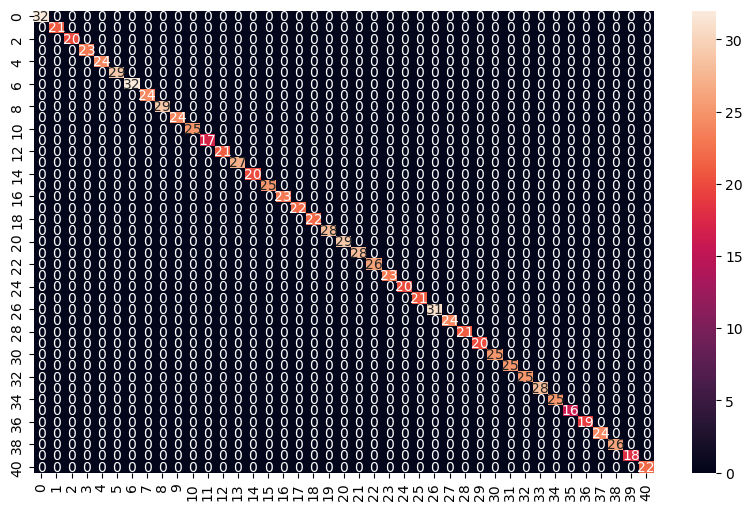

In [26]:
plt.figure(figsize = (10, 6))
sns.heatmap(cf_matrix, annot = True)

In [27]:
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rfc_pred = rfc.predict(X_test)

In [30]:
print(f"Accuracy on training dataset by RF classifier : {accuracy_score(y_train, rfc.predict(X_train))*100}")

Accuracy on training dataset by RF classifier : 100.0


In [31]:
print(f"Accuracy on testing dataset by RF classifier : {accuracy_score(y_test, rfc_pred)*100}")

Accuracy on testing dataset by RF classifier : 100.0


In [32]:
cf_matrix = confusion_matrix(y_test, rfc_pred)
cf_matrix

array([[32,  0,  0, ...,  0,  0,  0],
       [ 0, 21,  0, ...,  0,  0,  0],
       [ 0,  0, 20, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 26,  0,  0],
       [ 0,  0,  0, ...,  0, 18,  0],
       [ 0,  0,  0, ...,  0,  0, 22]])

<Axes: >

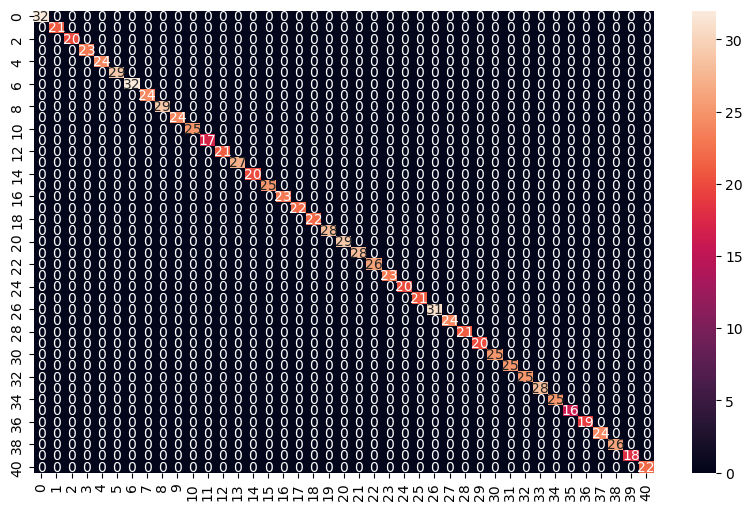

In [33]:
plt.figure(figsize = (10, 6))
sns.heatmap(cf_matrix, annot = True)

In [34]:
final_svm_model = SVC()
final_rf_model = RandomForestClassifier()

final_svm_model.fit(X,y)
final_rf_model.fit(X,y)

RandomForestClassifier()

In [35]:
test_data = pd.read_csv('Disease_Testing.csv').dropna(axis=1)

In [36]:
test_X = test_data.iloc[:, :-1]
test_y = encoder.transform(test_data.iloc[:,-1])

svm_preds = final_svm_model.predict(test_X)
rfc_preds = final_rf_model.predict(test_X)

In [37]:
zipped_predictions = list(zip(svm_preds, rfc_preds))
zipped_predictions

[(15, 15),
 (4, 4),
 (16, 16),
 (9, 9),
 (14, 14),
 (33, 33),
 (1, 1),
 (12, 12),
 (17, 17),
 (6, 6),
 (23, 23),
 (30, 30),
 (7, 7),
 (32, 32),
 (28, 28),
 (29, 29),
 (8, 8),
 (11, 11),
 (37, 37),
 (40, 40),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (3, 3),
 (36, 36),
 (10, 10),
 (34, 34),
 (13, 13),
 (18, 18),
 (39, 39),
 (26, 26),
 (24, 24),
 (25, 25),
 (31, 31),
 (5, 5),
 (0, 0),
 (2, 2),
 (38, 38),
 (35, 35),
 (27, 27),
 (15, 8)]

In [38]:
print(f"Accuracy on test dataset by SVM classifier : {accuracy_score(test_y, svm_preds)*100}")

Accuracy on test dataset by SVM classifier : 100.0


In [39]:
print(f"Accuracy on test dataset by RF classifier : {accuracy_score(test_y, rfc_preds)*100}")

Accuracy on test dataset by RF classifier : 97.61904761904762


In [40]:
symptoms = X.columns.values

symptom_index = {}

for index, value in enumerate(symptoms):
    symptom = ' '.join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes":encoder.classes_
}

print(data_dict["predictions_classes"])

def predictDisease(symptoms):
    
    symptoms = symptoms.split(",")
    input_data = [0]*len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1,-1)

    rf_predictions = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    svm_predictions = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    predictions = {
        "rf_model_prediction" : rf_predictions,
        "svm_model_prediction" : svm_predictions
    }

    return predictions

['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


In [41]:
print("Here are the list of symptoms you can enter: ")
for symp in data.columns:
    if symp != 'prognosis':
        print(symp)


user_symptoms = input("enter the symptoms seperated by comma and Capilatize the first letter : \n")
print(predictDisease(user_symptoms))

Here are the list of symptoms you can enter: 
itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blo

enter the symptoms seperated by comma and Capilatize the first letter : 
 Acidity,Stomach Pain


{'rf_model_prediction': 'GERD', 'svm_model_prediction': 'GERD'}


/opt/anaconda3/envs/basics/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/basics/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [42]:
# 16 - 06 - 2025

In [43]:
symptoms = X.columns.values

symptom_index = {}

for index, value in enumerate(symptoms):
    symptom = ' '.join([i.capitalize() for i in value.split("_")])
    symptom_index['symptom'] = index


data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

def predictDisease(symptoms):

    symptoms = symptoms.split(",")
    input_data = [0] * len(data_dict["symptom_index"])

    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1, -1)

    rf_predictions = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    svm_predictions = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    predictions = {
        "rf_model_prediction" : rf_predictions,
        "svm_model_prediction" : svm_predictions
    }

    return predictions


In [ ]:
print("Here are the list of symptoms you can enter: ")
for symp in data.columns:
    if symp != 'prognosis':
        print(symp)


user_symptoms = input("enter the symptoms seperated by comma and Capilatize the first letter : \n")
print(predictDisease(user_symptoms))

Here are the list of symptoms you can enter: 
itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blo